In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

SIZE = 10000

datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/wide_svd|2025-05-25/data.json"


In [2]:
# load the json, and normalize into a dataframe

df = util.load_data(datafile)


with open(datafile) as f:
    df = pd.json_normalize(json.load(f), record_path=["snapshots"],
                           meta=[
                               ["settings", "patchImprovement"],
                               ["settings", "patchRecovery"],
                               ["settings", "maxCost"],
                               ["settings", "boundaryConditions"],
                               ["settings", "numLocations"],
                               ["settings", "randomSeedWalkers"],
                               ["settings", "randomSeedLocations"],
                            ])

df["ratio"] = df["settings.patchImprovement"] / df["settings.patchRecovery"]
finals = df[df["steps"] == 10000]
# hopefully won't be necessary forever
# df["run_id"] = [i // 201 for i in range(df.shape[0])]

print("ratios:", df["ratio"].unique())
print("patch recovery:", df["settings.patchRecovery"].unique())
print("max costs:", df["settings.maxCost"].unique())
print("boundary conditions:", df["settings.boundaryConditions"].unique())
print("num locations:", df["settings.numLocations"].unique())
print("random walker seeds:", len(df["settings.randomSeedWalkers"].unique()))
print("random locations seeds:", len(df["settings.randomSeedLocations"].unique()))

In [14]:
print("ratios:", df["ratio"].unique())
print("patch recovery:", df["settings.patchRecovery"].unique())
print("max costs:", df["settings.maxCost"].unique())
print("boundary conditions:", df["settings.boundaryConditions"].unique())
print("num locations:", df["settings.numLocations"].unique())
print("random walker seeds:", len(df["settings.randomSeedWalkers"].unique()))
print("random locations seeds:", len(df["settings.randomSeedLocations"].unique()))

ratios: [75.0 50.0 25.0]
patch recovery: [0.002 0.0002]
max costs: [2.0]
boundary conditions: ['SOLID']
num locations: [10]
random walker seeds: 100
random locations seeds: 1


In [26]:
def plot_patches(df, MAX_IMAGES=32):
    IM_PER_ROW = 4

    if len(df) < MAX_IMAGES:
        MAX_IMAGES = len(df)

    fig, axs = plt.subplots(math.ceil(MAX_IMAGES / IM_PER_ROW), IM_PER_ROW)
    for i in range(MAX_IMAGES):
        ax = axs[i//IM_PER_ROW, i%IM_PER_ROW]
        ax.imshow(np.reshape(df["patches"].iloc[i], (100, 100)))
    plt.show()

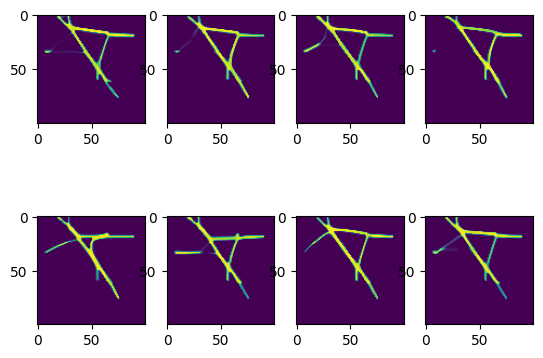

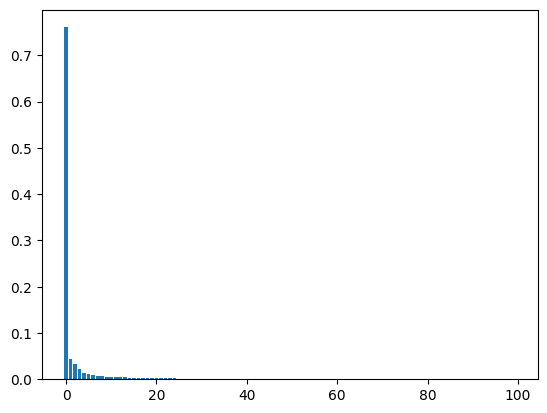

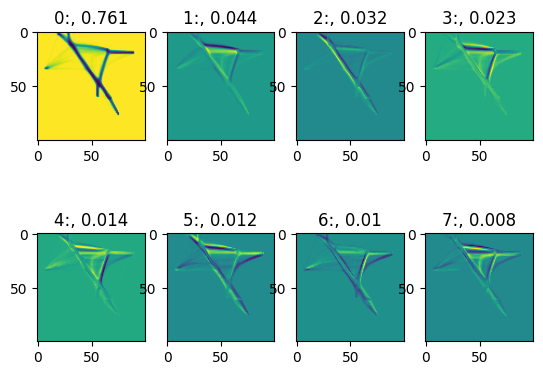

In [28]:
_finals = df[
    (df["settings.patchRecovery"] == 0.002) &
    (df["ratio"] == 50.0) &
    # (df["settings.numLocations"] == 10) &
    # (df["settings.randomSeedLocations"] == 1) &
    # (df["settings.boundaryConditions"] == "SOLID")
    (df["steps"] == 10000)
]

plot_patches(_finals, MAX_IMAGES=8)
util.svd(_finals);

In [ ]:
patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.002)]["patches"]

num_observations = len(patches)
num_features = len(patches.iloc[0])
# observations as rows, features as columns
A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# A = A - np.mean(A, axis=0)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
V = Vh.T

In [ ]:
S.shape

In [ ]:
for i in range(5):
    df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

In [ ]:
jdf = df[df["settings.patchRecovery"] == 0.002]

In [ ]:
# for i in range(5):
#     sns.lineplot(data=jdf[jdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
#     plt.show()

In [ ]:
# patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]["patches"]

# num_observations = len(patches)
# num_features = len(patches.iloc[0])
# # observations as rows, features as columns
# A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# # we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# # A = A - np.mean(A, axis=0)
# U, S, Vh = np.linalg.svd(A, full_matrices=False)
# V = Vh.T

# for i in range(5):
#     df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

sdf = df[df["settings.patchRecovery"] == 0.0002]

for i in range(5):
    sns.lineplot(data=sdf[sdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
    plt.show()

In [ ]:
sns.relplot(data=sdf, x="U1", y="U2", hue="steps")